correlation matrix AxesSubplot(0.125,0.125;0.62x0.755)
 
monthwise mean 
 month
1      2.67310
2      7.16470
3     14.54290
4     21.62410
5     26.55160
6     24.88840
7     20.86120
8     13.20730
9      5.02600
10     0.45232
11    -0.05744
12    -0.46550
Name: value, dtype: float64


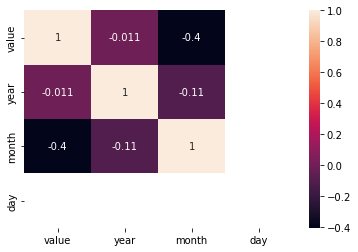

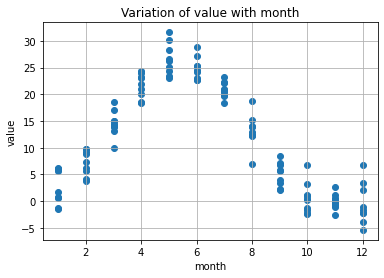

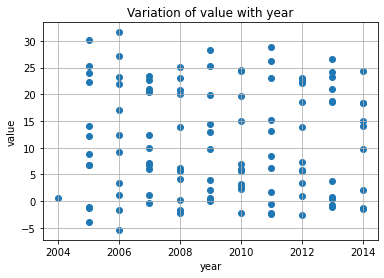

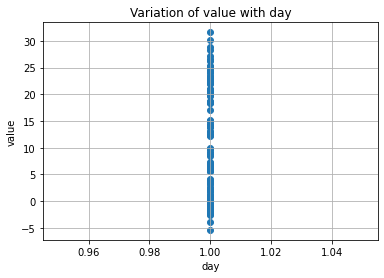

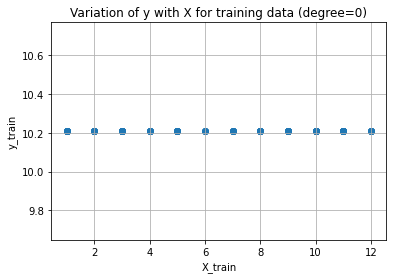

RMSE (train):  10.026152042205657
RMSE (validation):  10.36667420154994


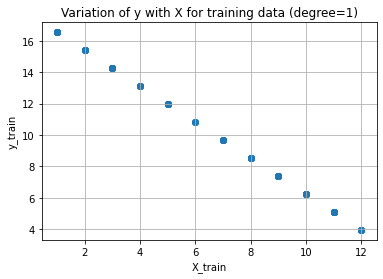

RMSE (train):  9.161151454771685
RMSE (validation):  9.54887533184763


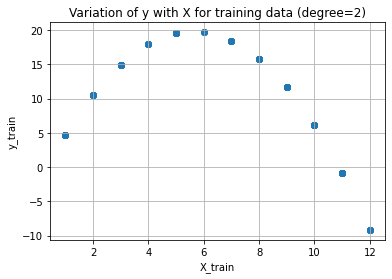

RMSE (train):  5.585640366108776
RMSE (validation):  4.785358851982383


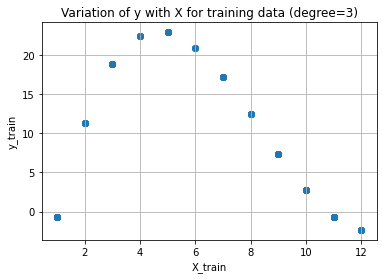

RMSE (train):  4.150853000010837
RMSE (validation):  3.1432256669840597


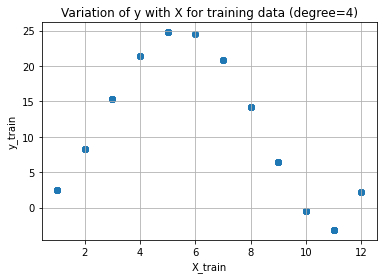

RMSE (train):  3.008153406151635
RMSE (validation):  2.543970721285547


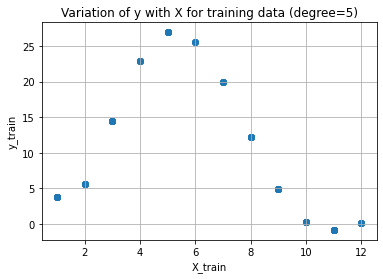

RMSE (train):  2.461891271962425
RMSE (validation):  2.8357939053911205


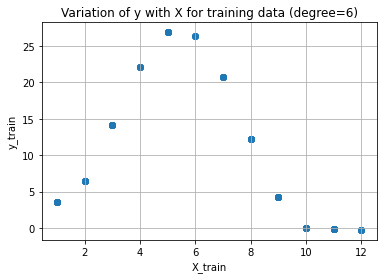

RMSE (train):  2.4016053372680934
RMSE (validation):  2.798012463241181


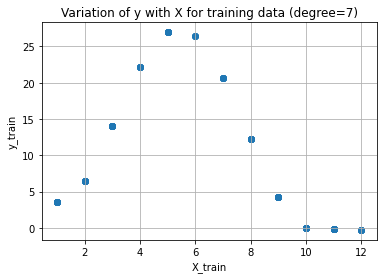

RMSE (train):  2.4013028878507567
RMSE (validation):  2.8031840602933564


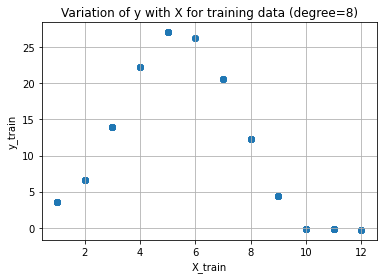

RMSE (train):  2.399701820722431
RMSE (validation):  2.7952826011754213


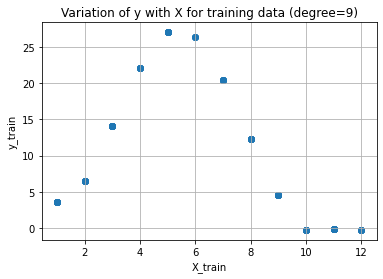

RMSE (train):  2.398562683692865
RMSE (validation):  2.8108394001250954


In [65]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression as LR
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import sklearn.metrics as metrics
import seaborn as sns
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
import warnings

df2 = pd.read_csv('train_3.csv')
df2['new_id'] = pd.to_datetime(df2['id'])
df2['year'] = df2['new_id'].dt.year
df2['month'] = df2['new_id'].dt.month
df2['day'] = df2['new_id'].dt.day

print('correlation matrix' , sns.heatmap(df2.corr(),annot=True))
print(" ")
print('monthwise mean \n', df2.groupby('month').mean()['value'])

X = df2['month']
y = df2['value']

plt.figure()
plt.xlabel('month')
plt.ylabel('value')
plt.title('Variation of value with month')
plt.grid(visible=True)
plt.scatter(df2['month'],df2['value'])
plt.show()

plt.figure()
plt.xlabel('year')
plt.ylabel('value')
plt.title('Variation of value with year')
plt.grid(visible=True)
plt.scatter(df2['year'],df2['value'])
plt.show()

plt.figure()
plt.xlabel('day')
plt.ylabel('value')
plt.title('Variation of value with day')
plt.grid(visible=True)
plt.scatter(df2['day'],df2['value'])
plt.show()

X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.33,random_state=42)
X_train, X_val, y_train, y_val = np.array(X_train),np.array(X_val),np.array(y_train),np.array(y_val)


RMSE_train =[]
RMSE_val =[]
max_degree = 10
for i in range(max_degree):
    
    poly = PolynomialFeatures(degree=i)
    x_poly = poly.fit_transform(X_train.reshape(-1,1))
    model = LR()
    model.fit(x_poly,y_train)
    y_pred = model.predict(x_poly)
    
    plt.figure()
    plt.xlabel('X_train')
    plt.ylabel('y_train')
    plt.title(f'Variation of y with X for training data (degree={i})')
    plt.grid(visible=True)
    plt.scatter(X_train,y_pred)
    plt.show()

    print('RMSE (train): ' ,np.sqrt(metrics.mean_squared_error(y_train,y_pred)))


    x_poly_val = poly.fit_transform(X_val.reshape(-1,1))
    y_val_pred = model.predict(x_poly_val)
    print('RMSE (validation): ' ,np.sqrt(metrics.mean_squared_error(y_val,y_val_pred)))
    RMSE_train.append(np.sqrt(metrics.mean_squared_error(y_train,y_pred)))
    RMSE_val.append(np.sqrt(metrics.mean_squared_error(y_val,y_val_pred)))


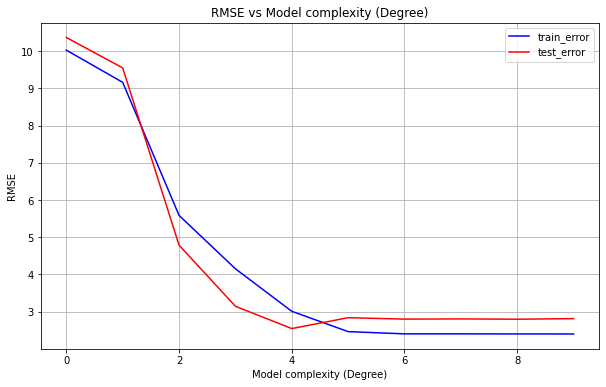

2.398562683692865 2.543970721285547


In [66]:
plt.figure(figsize=(10,6))
plt.plot(range(max_degree),RMSE_train,c='b',label='train_error')
plt.plot(range(max_degree),RMSE_val,c='r',label='test_error')
plt.xlabel('Model complexity (Degree)')
plt.ylabel('RMSE')
plt.title('RMSE vs Model complexity (Degree)')
plt.legend()
plt.grid()
plt.show()
print(min(RMSE_train),min(RMSE_val))

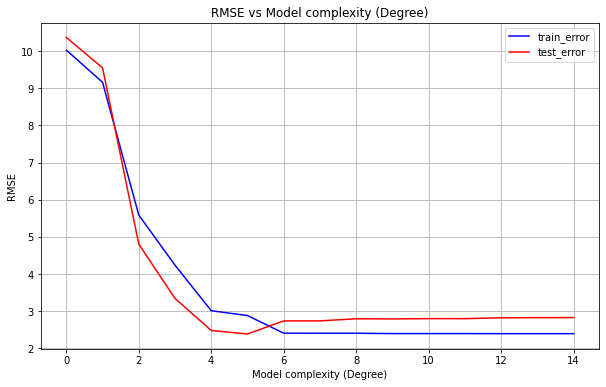

2.3970952938106063 2.3889439328598407


In [69]:
warnings.filters
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.33,random_state=42)
X_train, X_val, y_train, y_val = np.array(X_train),np.array(X_val),np.array(y_train),np.array(y_val)


RMSE_train =[]
RMSE_val =[]
max_degree = 15
for i in range(max_degree):
    
    poly = PolynomialFeatures(degree=i)
    x_poly = poly.fit_transform(X_train.reshape(-1,1))
    model = Ridge()
    model.fit(x_poly,y_train)
    y_pred = model.predict(x_poly)

    x_poly_val = poly.fit_transform(X_val.reshape(-1,1))
    y_val_pred = model.predict(x_poly_val)
#     print('RMSE (validation): ' ,np.sqrt(metrics.mean_squared_error(y_val,y_val_pred)))
    RMSE_train.append(np.sqrt(metrics.mean_squared_error(y_train,y_pred)))
    RMSE_val.append(np.sqrt(metrics.mean_squared_error(y_val,y_val_pred)))

plt.figure(figsize=(10,6))
plt.plot(range(max_degree),RMSE_train,c='b',label='train_error')
plt.plot(range(max_degree),RMSE_val,c='r',label='test_error')
plt.xlabel('Model complexity (Degree)')
plt.ylabel('RMSE')
plt.title('RMSE vs Model complexity (Degree)')
plt.legend()
plt.grid()
plt.show()
print(min(RMSE_train),min(RMSE_val))

In [70]:
poly = PolynomialFeatures(degree=5)
x_poly = poly.fit_transform(np.array(X).reshape(-1,1))
model = Ridge()

In [71]:
alpha = np.linspace(0,1,11)
clf = GridSearchCV(model,{'alpha':alpha},scoring='neg_mean_squared_error',cv=5)
clf.fit(x_poly,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])},
             scoring='neg_mean_squared_error')

In [72]:
clf.best_params_

{'alpha': 0.0}

In [73]:
df3 = pd.read_csv("test_3.csv")
df3['new'] = pd.to_datetime(df3['id'])
df3['month'] = df3['new'].dt.month
X_test = df3['month']
X_test = np.array(X_test).reshape(-1,1)
x_poly_test = poly.fit_transform(X_test)
y_test_pred = clf.predict(x_poly_test)
y = pd.DataFrame({'id':df3['id'],'value':y_test_pred})

 
final y_predicted on test data
 
        id      value
0   5/1/10  22.083932
1   4/1/09  19.480007
2   9/1/13   7.495867
3   1/1/06   5.116543
4   2/1/07  10.084879
5   8/1/12  14.518093
6   6/1/14  22.297976
7   3/1/08  15.188267
8  12/1/04   1.357259
9   7/1/11  19.736774


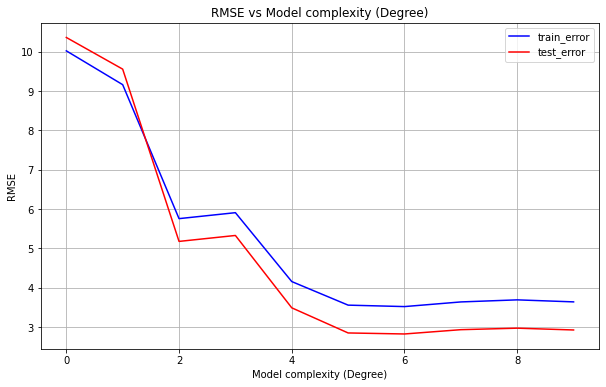

3.518148756390446 2.8211183755599625


In [74]:
warnings.filters
X = df2['month']
y = df2['value']

X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.33,random_state=42)
X_train, X_val, y_train, y_val = np.array(X_train),np.array(X_val),np.array(y_train),np.array(y_val)


RMSE_train =[]
RMSE_val =[]
max_degree = 10
for i in range(max_degree):
    
    poly = PolynomialFeatures(degree=i)
    x_poly = poly.fit_transform(X_train.reshape(-1,1))
    model = Lasso()
    model.fit(x_poly,y_train)
    y_pred = model.predict(x_poly)

    x_poly_val = poly.fit_transform(X_val.reshape(-1,1))
    y_val_pred = model.predict(x_poly_val)
#     print('RMSE (validation): ' ,np.sqrt(metrics.mean_squared_error(y_val,y_val_pred)))
    RMSE_train.append(np.sqrt(metrics.mean_squared_error(y_train,y_pred)))
    RMSE_val.append(np.sqrt(metrics.mean_squared_error(y_val,y_val_pred)))


df3 = pd.read_csv("test_3.csv")
df3['new'] = pd.to_datetime(df3['id'])
df3['month'] = df3['new'].dt.month
X_test = df3['month']
X_test = np.array(X_test).reshape(-1,1)
x_poly_test = poly.fit_transform(X_test)
y_test_pred = model.predict(x_poly_test)
y = pd.DataFrame({'id':df3['id'],'value':y_test_pred})
y.to_csv('2021AMA2637_dummy.csv')
print(" ")
print('final y_predicted on test data')
print(" ")
print(pd.DataFrame(y))

plt.figure(figsize=(10,6))
plt.plot(range(max_degree),RMSE_train,c='b',label='train_error')
plt.plot(range(max_degree),RMSE_val,c='r',label='test_error')
plt.xlabel('Model complexity (Degree)')
plt.ylabel('RMSE')
plt.title('RMSE vs Model complexity (Degree)')
plt.legend()
plt.grid()
plt.show()
print(min(RMSE_train),min(RMSE_val))

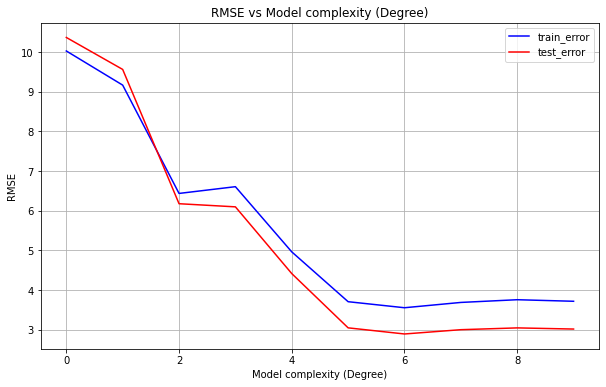

3.5547577285594327 2.893546895392563


In [75]:
warnings.filters
X = df2['month']
y = df2['value']

X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.33,random_state=42)
X_train, X_val, y_train, y_val = np.array(X_train),np.array(X_val),np.array(y_train),np.array(y_val)


RMSE_train =[]
RMSE_val =[]
max_degree = 10
for i in range(max_degree):
    
    poly = PolynomialFeatures(degree=i)
    x_poly = poly.fit_transform(X_train.reshape(-1,1))
    model = ElasticNet()
    model.fit(x_poly,y_train)
    y_pred = model.predict(x_poly)

    x_poly_val = poly.fit_transform(X_val.reshape(-1,1))
    y_val_pred = model.predict(x_poly_val)
#     print('RMSE (validation): ' ,np.sqrt(metrics.mean_squared_error(y_val,y_val_pred)))
    RMSE_train.append(np.sqrt(metrics.mean_squared_error(y_train,y_pred)))
    RMSE_val.append(np.sqrt(metrics.mean_squared_error(y_val,y_val_pred)))

plt.figure(figsize=(10,6))
plt.plot(range(max_degree),RMSE_train,c='b',label='train_error')
plt.plot(range(max_degree),RMSE_val,c='r',label='test_error')
plt.xlabel('Model complexity (Degree)')
plt.ylabel('RMSE')
plt.title('RMSE vs Model complexity (Degree)')
plt.legend()
plt.grid()
plt.show()
print(min(RMSE_train),min(RMSE_val))

In [76]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
import warnings

warnings.filterwarnings('ignore')

X = df2['month']
y = df2['value']
alpha = np.linspace(0,1,11)
l1_ratio = np.linspace(0,1,6)
X = np.array(X).reshape(-1,1)
poly = PolynomialFeatures(degree=6)
x_poly = poly.fit_transform(X)
model = ElasticNet()


In [77]:
clf = GridSearchCV(model,
              {'alpha':alpha, 'l1_ratio':l1_ratio},
              cv = 5,scoring = 'neg_mean_squared_error')

In [78]:
clf.fit(x_poly,y)

GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
                         'l1_ratio': array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])},
             scoring='neg_mean_squared_error')

In [79]:
clf.best_params_

{'alpha': 0.1, 'l1_ratio': 0.6000000000000001}

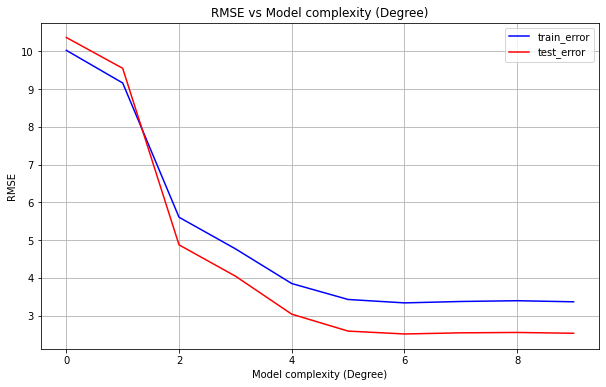

3.3368669544519896 2.5134500220370497


In [80]:
warnings.filters
X = df2['month']
y = df2['value']

X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.33,random_state=42)
X_train, X_val, y_train, y_val = np.array(X_train),np.array(X_val),np.array(y_train),np.array(y_val)


RMSE_train =[]
RMSE_val =[]
max_degree = 10
for i in range(max_degree):
    
    poly = PolynomialFeatures(degree=i)
    x_poly = poly.fit_transform(X_train.reshape(-1,1))
    model = ElasticNet(alpha=0.1, l1_ratio=0.6)
    model.fit(x_poly,y_train)
    y_pred = model.predict(x_poly)

    x_poly_val = poly.fit_transform(X_val.reshape(-1,1))
    y_val_pred = model.predict(x_poly_val)
#     print('RMSE (validation): ' ,np.sqrt(metrics.mean_squared_error(y_val,y_val_pred)))
    RMSE_train.append(np.sqrt(metrics.mean_squared_error(y_train,y_pred)))
    RMSE_val.append(np.sqrt(metrics.mean_squared_error(y_val,y_val_pred)))

plt.figure(figsize=(10,6))
plt.plot(range(max_degree),RMSE_train,c='b',label='train_error')
plt.plot(range(max_degree),RMSE_val,c='r',label='test_error')
plt.xlabel('Model complexity (Degree)')
plt.ylabel('RMSE')
plt.title('RMSE vs Model complexity (Degree)')
plt.legend()
plt.grid()
plt.show()
print(min(RMSE_train),min(RMSE_val))